


Epoch 1/10


85/85 [==============================] - 15s 152ms/step - loss: 0.7355 - accuracy: 0.6641 - val_loss: 0.6967 - val_accuracy: 0.6844
Epoch 2/10
85/85 [==============================] - 13s 158ms/step - loss: 0.7062 - accuracy: 0.6815 - val_loss: 0.6807 - val_accuracy: 0.6844
Epoch 3/10
85/85 [==============================] - 13s 156ms/step - loss: 0.7074 - accuracy: 0.6815 - val_loss: 0.6751 - val_accuracy: 0.6844
Epoch 4/10
85/85 [==============================] - 13s 155ms/step - loss: 0.6979 - accuracy: 0.6815 - val_loss: 0.6770 - val_accuracy: 0.6844
Epoch 5/10
85/85 [==============================] - 12s 137ms/step - loss: 0.7026 - accuracy: 0.6815 - val_loss: 0.6732 - val_accuracy: 0.6844
Epoch 6/10
85/85 [==============================] - 12s 139ms/step - loss: 0.6970 - accuracy: 0.6815 - val_loss: 0.6734 - val_accuracy: 0.6844
Epoch 7/10
85/85 [==============================] - 12s 140ms/step - loss: 0.6972 - accuracy: 0.6815 - val_loss: 0.6826 - val_accuracy: 0

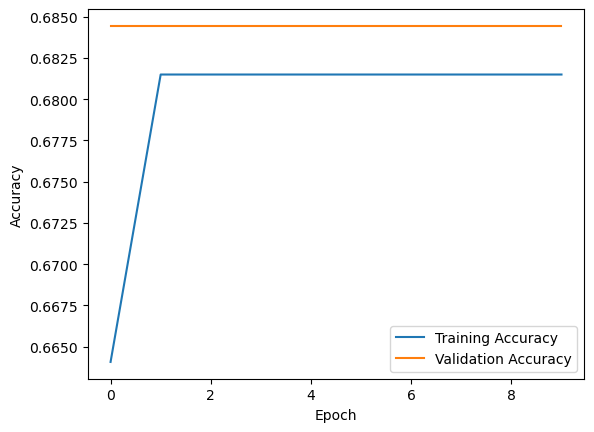

2/2 [==============================] - 0s 20ms/step
Predicted: train, Actual: predict
Predicted: train, Actual: predict
Predicted: train, Actual: predict
Predicted: train, Actual: predict
Predicted: train, Actual: predict


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_images(folder_path, label):
    images = []
    labels = []

    for folder in os.listdir(folder_path):
        folder_path_full = os.path.join(folder_path, folder)

        if os.path.isdir(folder_path_full):
            for filename in os.listdir(folder_path_full):
                img_path = os.path.join(folder_path_full, filename)
                
                # Check if the image is successfully loaded
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (64, 64))
                    images.append(img)
                    labels.append(label)

    return np.array(images), np.array(labels)

# Load images and labels for training set
train_images, train_labels = load_images('My_data/train', label='train')

# Load images and labels for testing set
test_images, test_labels = load_images('My_data/test', label='test')

# Load images for prediction set
predict_images, predict_labels = load_images('My_data/predict', label='predict')

# Combine training and testing data for data cleaning and preprocessing
all_images = np.concatenate([train_images, test_images, predict_images], axis=0)
all_labels = np.concatenate([train_labels, test_labels, predict_labels], axis=0)

# Data Cleaning and Preprocessing Steps
# (You can add more preprocessing steps based on your requirements)

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
all_labels_one_hot = label_binarizer.fit_transform(all_labels)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels_one_hot, test_size=0.2, random_state=42
)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Assuming 3 classes: 'train', 'test', 'predict'
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation (optional but can improve model generalization)
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_images)

# Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions on the prediction set
predictions = model.predict(predict_images)

# Display the first few predictions
for i in range(5):
    print(f"Predicted: {label_binarizer.classes_[np.argmax(predictions[i])]}, Actual: {label_binarizer.classes_[np.argmax(predict_labels[i])]}")

# (You can add more visualizations and analysis based on your requirements)
